In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterstats
import matplotlib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [ ]:
# KD which file is used as the DEM - could we keep evertyhing in NAVD88 instead of converting to reduce uncertainty?
#NOAA DEMs notes
# NAVD88 - datum for second download - in meters
# MHW - datum for SLR DEM download
#NAVD88 is 2.700 m lower than MWH in Eastport - https://tidesandcurrents.noaa.gov/datums.html?datum=NAVD88&units=1&epoch=0&id=8410140&name=Eastport&state=ME

In [ ]:
#KD notes
# to get from NAVD88 to HAT: NAVD88 -3.909 = HAT. 
# All data is from excel tide guage spreadsheet 'KD_Eastport_tide_guage_JAN24_NAVD_Meters', downloaded in NAVD88 meters 
# for entire month of January
# largest storm surge reported at Eastport tide guage is 1.112m (verified minus predicted tide) on 1/10/24
# largest tide height predicted reported at Eastport tide guage is -0.464m on 1/13/24
# the highest tide possible with highest predicted + storm surge is 0.648m above HAT USE FOR PREDICTIONS - didn't actually happen

In [2]:
pts = gpd.read_file(r"C:\Users\kdewa\Documents\Archaeology_GIS\Cobscook-selected\Cobscook_Arch_pts.gpkg")

In [5]:
# pts['NAVD88']=rasterstats.point_query(pts.geometry,'/Users/willkochtitzky/Projects/UNE/Cobscook/me2017_eastern_Job786159/me2017_eastern_Job786159.tif',interpolate='nearest')
# pts['NAVD88_2']=rasterstats.point_query(pts.geometry,'/Users/willkochtitzky/Projects/UNE/Cobscook/me2017_eastern_Job786160/me2017_eastern_Job786160.tif',interpolate='nearest')
# pts['MHW']=rasterstats.point_query(pts.geometry,'/Users/willkochtitzky/Projects/UNE/Cobscook/NOAA_SLR_DEM_Job786141/Job786141_NOAA_SLR_DEM_with_no_data_final.tif',interpolate='nearest')
# pts['MHW_2'] = pts['NAVD88']+2.7 # convert between NAVD88 and MHW

# pts['HAT']= pts['MHW']-1.209 #convert MHW to HAT - https://tidesandcurrents.noaa.gov/datums.html?datum=MHW&units=1&epoch=0&id=8410140&name=Eastport&state=ME
# pts['HAT'].fillna(pts['MHW_2']-1.209,inplace=True)
# pts['HAT'].fillna(pts['NAVD88_2']+2.7-1.209,inplace=True)

In [3]:
pts['NAVD88'] = rasterstats.point_query(pts.geometry, r'C:\Users\kdewa\Documents\Archaeology_GIS\Cobscook-selected\ne2011_usgs_mosaic6348.tif', interpolate='nearest')
pts['HAT']=pts['NAVD88']-3.909#convert NAVD88 to HAT - unceratinty = 12 cm
pts

,MHPC Site Number,Town,RSPF Site Number,Alternate Name(s),Dates of visits,Notes,Notable references,Landowner,Access Notes,NAD83 Easting,NAD83 Northing,Coords updated from MHPC data,MHPC Forms Updated,Visited,Excavations by NEAS,Excavations by Us,Located,Unable to Locate,Confirmed Destroyed,geometry,NAVD88,HAT
0,080.001-,Eastport,Me 126/1 RSPF,"Moose Island, 'The Eastport Site'",4 June 21,"Visited, some shell visible and location appar...",None,Unknown,None,655003.0,4976712.0,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,POINT (655003.000 4976712.000),3.946250,0.037250
1,080.002-,Perry,Me 126/2 RSPF,Toll Bridge Site,7 Aug 2019,Extensively excavated by NEAS,None,Poss for sale,Accessible from beach at end of Old Eastport Road,653640.0,4977676.0,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,POINT (653640.000 4977676.000),3.590000,-0.319000
2,080.003-,Edmunds Twp,Me 126/13 RSPF,None,Unvisited,None,None,Unknown,None,643851.0,4972766.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (643851.000 4972766.000),NaN,NaN
3,080.004-,Edmunds Twp,Me 126/14 RSPF,None,Unvisited,None,None,Unknown,None,643585.0,4972420.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (643585.000 4972420.000),3.426269,-0.482731
4,080.005-,Washington County Island,Me 126/2 RSPF,None,Unvisited,None,None,Unknown,None,645775.0,4970241.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (645775.000 4970241.000),2.648571,-1.260429
5,080.006-,Edmunds Twp,Me 126/7 RSPF,None,Unvisited,None,None,Unknown,None,645564.0,4970575.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (645564.000 4970575.000),9.720000,5.811000
6,080.007-,Washington County Island,Me 126/7 RSPF,None,Unvisited,None,None,Unknown,None,645578.0,4970982.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (645578.000 4970982.000),6.695000,2.786000
7,080.008-,Pembroke,Me 126/8 RSPF,None,Unvisited,None,None,Unknown,None,646261.0,4972603.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646261.000 4972603.000),6.830000,2.921000
8,080.009-,Pembroke,Me 126/9 RSPF,None,Unvisited,None,None,Unknown,None,646481.0,4971606.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646481.000 4971606.000),3.916667,0.007667
9,080.010-,Washington County Island,Me 126/10 RSPF,None,Unvisited,None,None,Unknown,None,646023.0,4970439.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646023.000 4970439.000),6.396000,2.487000


-inf

In [4]:
for dist in [5, 10, 20, 40]:
    X_distance = dist
    dataset= r"C:\Users\kdewa\Documents\Archaeology_GIS\Cobscook-selected\ne2011_usgs_mosaic6348_MHW_v2_gt0_v2_nodata_v2.vrt"
    for i in range(0,len(pts)):
        pts.loc[i,'MHW_mean_within_'+str(dist)+'m']=rasterstats.zonal_stats(pts.buffer(X_distance)[i],dataset,stats='mean', nodata=np.nan)[0]['mean']
        pts.loc[i,'MHW_min_within_'+str(dist)+'m']=rasterstats.zonal_stats(pts.buffer(X_distance)[i],dataset,stats='min', nodata=np.nan)[0]['min']
        pts.loc[i,'MHW_max_within_'+str(dist)+'m']=rasterstats.zonal_stats(pts.buffer(X_distance)[i],dataset,stats='max', nodata=np.nan)[0]['max']


C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow 

In [36]:
pts

,MHPC Site Number,Town,RSPF Site Number,Alternate Name(s),Dates of visits,Notes,Notable references,Landowner,Access Notes,NAD83 Easting,NAD83 Northing,Coords updated from MHPC data,MHPC Forms Updated,Visited,Excavations by NEAS,Excavations by Us,Located,Unable to Locate,Confirmed Destroyed,geometry,NAVD88,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m,HAT_mean_within_5m,HAT_min_within_5m,HAT_max_within_5m
0,080.052-,Whiting,None,None,Unvisited,None,None,Unknown,None,643195.0,4960590.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (643195.000 4960590.000),16.881428,12.972428,1.417972e+01,1.405600e+01,1.434000e+01,1.457648e+01,1.366603e+01,1.757750e+01,-1.701412e+38,-3.402823e+38,2.085500e+01,-1.701412e+38,-3.402823e+38,2.321200e+01,1.297072e+01,1.284700e+01,1.313100e+01
1,080.055-,Edmunds Twp,None,None,Unvisited,None,None,Unknown,None,645501.0,4964207.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (645501.000 4964207.000),5.100000,1.191000,2.173221e+00,1.800000e+00,2.480000e+00,-1.701412e+38,-3.402823e+38,2.898571e+00,-1.701412e+38,-3.402823e+38,2.990000e+00,-1.701412e+38,-3.402823e+38,4.045000e+00,9.642214e-01,5.910000e-01,1.271000e+00
2,080.036-,Edmunds Twp,Me 126/24 RSPF,None,Unvisited,None,None,Unknown,None,646208.0,4966340.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646208.000 4966340.000),2.168750,-1.740250,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-1.701412e+38,-3.402823e+38,1.100000e+00,-1.701412e+38,-3.402823e+38,1.520000e+00,-3.402823e+38,-3.402823e+38,-3.402823e+38
3,080.047-,Edmunds Twp,Me 126/47?RSPF,None,Unvisited,None,None,Unknown,None,646315.0,4968070.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646315.000 4968070.000),6.420000,2.511000,3.504097e+00,6.650000e-01,5.000000e+00,-1.701412e+38,-3.402823e+38,5.360001e+00,-1.701412e+38,-3.402823e+38,5.700000e+00,-1.701412e+38,-3.402823e+38,6.472857e+00,2.295097e+00,-5.440000e-01,3.791000e+00
4,080.038-,Lubec,Me 126/38 RSPF,None,Unvisited,None,None,Unknown,None,654491.0,4968089.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (654491.000 4968089.000),10.775000,6.866000,8.088165e+00,6.360001e+00,1.008000e+01,-1.701412e+38,-3.402823e+38,1.356000e+01,-1.701412e+38,-3.402823e+38,1.677000e+01,-1.701412e+38,-3.402823e+38,2.132500e+01,6.879165e+00,5.151001e+00,8.871000e+00
5,080.046-,Lubec,Me 126/46 RSPF,None,Unvisited,None,None,Unknown,None,655182.0,4968739.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (655182.000 4968739.000),8.730000,4.821000,5.097791e+00,2.085000e+00,6.440001e+00,4.593962e+00,1.090007e-02,6.550000e+00,-1.701412e+38,-3.402823e+38,6.900001e+00,-1.701412e+38,-3.402823e+38,7.510000e+00,3.888791e+00,8.759998e-01,5.231001e+00
6,080.045-,Lubec,Me 126/45 RSPF,None,Unvisited,None,None,Unknown,None,655541.0,4968777.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (655541.000 4968777.000),4.839615,0.930615,2.915966e+00,7.200001e-01,5.049697e+00,-1.701412e+38,-3.402823e+38,5.660000e+00,-1.701412e+38,-3.402823e+38,6.150001e+00,-1.701412e+38,-3.402823e+38,6.520000e+00,1.706966e+00,-4.889999e-01,3.840697e+00
7,080.044-,Edmunds Twp,Me 126/44 RSPF,None,Unvisited,None,None,Unknown,None,646306.0,4968779.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646306.000 4968779.000),4.797500,0.888500,1.926580e+00,1.110000e+00,2.360000e+00,1.911395e+00,9.057143e-01,2.680000e+00,-1.701412e+38,-3.402823e+38,5.016125e+00,-1.701412e+38,-3.402823e+38,1.285000e+01,7.175797e-01,-9.900010e-02,1.151000e+00
8,080.011-,Edmunds Twp,Me 126/11 RSPF,None,Unvisited,None,None,Unknown,None,646116.0,4969224.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646116.000 4969224.000),4.936666,1.027666,2.150961e+00,1.360000e+00,2.595000e+00,2.108813e+00,1.325000e-01,2.888333e+00,-1.701412e+38,-3.402823e+

In [5]:
# Select only the columns that contain MHW statistics
mhw_columns = [f'MHW_mean_within_{dist}m' for dist in [5, 10, 20, 40]] + \
              [f'MHW_min_within_{dist}m' for dist in [5, 10, 20, 40]] + \
              [f'MHW_max_within_{dist}m' for dist in [5, 10, 20, 40]]

# Count the occurrences of -inf in each MHW statistic column
inf_counts = pts[mhw_columns].isin([-np.inf]).sum()

print("Counts of -inf values:")
print(inf_counts)

Counts of -inf values:
MHW_mean_within_5m     17
MHW_mean_within_10m    37
MHW_mean_within_20m    64
MHW_mean_within_40m    73
MHW_min_within_5m       0
MHW_min_within_10m      0
MHW_min_within_20m      0
MHW_min_within_40m      0
MHW_max_within_5m       0
MHW_max_within_10m      0
MHW_max_within_20m      0
MHW_max_within_40m      0
dtype: int64


In [7]:
for dist in [5, 10, 20, 40]:
    X_distance = dist
    dataset = r"C:\Users\kdewa\Documents\Archaeology_GIS\Cobscook-selected\ne2011_usgs_mosaic6348_MHW_v2_gt0_v2_nodata_v2.vrt"
    for i in range(len(pts)):
        # Calculate zonal statistics
        stats = rasterstats.zonal_stats(pts.buffer(X_distance)[i], dataset, stats=['mean', 'min', 'max'], nodata=np.nan)[0]
        
        # Assign min and max statistics directly
        pts.loc[i, f'MHW_min_within_{dist}m'] = stats['min']
        pts.loc[i, f'MHW_max_within_{dist}m'] = stats['max']
        
        # Check if the mean value is -inf, and if so, replace it with the average of min and max
        mean_value = stats['mean']
        if mean_value == -np.inf:
            pts.loc[i, f'MHW_mean_within_{dist}m'] = (stats['min'] + stats['max']) / 2
        else:
            pts.loc[i, f'MHW_mean_within_{dist}m'] = mean_value

C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\kdewa\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow 

In [33]:
pts.head()

,MHPC Site Number,Town,RSPF Site Number,Alternate Name(s),Dates of visits,Notes,Notable references,Landowner,Access Notes,NAD83 Easting,NAD83 Northing,Coords updated from MHPC data,MHPC Forms Updated,Visited,Excavations by NEAS,Excavations by Us,Located,Unable to Locate,Confirmed Destroyed,geometry,NAVD88,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m,MHW_within_5m,HAT_mean_within_5m,HAT_min_within_5m,HAT_max_within_5m
0,080.052-,Whiting,None,None,Unvisited,None,None,Unknown,None,643195.0,4960590.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (643195.000 4960590.000),16.881428,12.972428,1.417972e+01,1.405600e+01,1.434000e+01,1.457648e+01,1.366603e+01,1.757750e+01,-1.701412e+38,-3.402823e+38,20.855000,-1.701412e+38,-3.402823e+38,23.212000,NaN,NaN,NaN,NaN
1,080.055-,Edmunds Twp,None,None,Unvisited,None,None,Unknown,None,645501.0,4964207.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (645501.000 4964207.000),5.100000,1.191000,2.173221e+00,1.800000e+00,2.480000e+00,-1.701412e+38,-3.402823e+38,2.898571e+00,-1.701412e+38,-3.402823e+38,2.990000,-1.701412e+38,-3.402823e+38,4.045000,NaN,0.882621,0.579389,1.136298
2,080.036-,Edmunds Twp,Me 126/24 RSPF,None,Unvisited,None,None,Unknown,None,646208.0,4966340.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646208.000 4966340.000),2.168750,-1.740250,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-1.701412e+38,-3.402823e+38,1.100000,-1.701412e+38,-3.402823e+38,1.520000,NaN,-1.927963,-1.977721,-1.872040
3,080.047-,Edmunds Twp,Me 126/47?RSPF,None,Unvisited,None,None,Unknown,None,646315.0,4968070.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646315.000 4968070.000),6.420000,2.511000,3.504097e+00,6.650000e-01,5.000000e+00,-1.701412e+38,-3.402823e+38,5.360001e+00,-1.701412e+38,-3.402823e+38,5.700000,-1.701412e+38,-3.402823e+38,6.472857,NaN,-0.012196,-1.614013,1.859503
4,080.038-,Lubec,Me 126/38 RSPF,None,Unvisited,None,None,Unknown,None,654491.0,4968089.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (654491.000 4968089.000),10.775000,6.866000,8.088165e+00,6.360001e+00,1.008000e+01,-1.701412e+38,-3.402823e+38,1.356000e+01,-1.701412e+38,-3.402823e+38,16.769999,-1.701412e+38,-3.402823e+38,21.324999,NaN,6.973199,5.351352,8.833405


In [8]:
pts.to_csv('Cobscook_arch_sites_with_elevation.csv')

PermissionError: [Errno 13] Permission denied: 'Cobscook_arch_sites_with_elevation.csv'

In [14]:
# pts['HAT_mean_within_Xm'] = pts['NAVD88_mean_within_Xm']-3.909 #convert NAVD88 to HAT
# pts['HAT_min_within_Xm'] = pts['NAVD88_min_within_Xm']-3.909 #convert NAVD88 to HAT
# pts['HAT_max_within_Xm'] = pts['NAVD88_max_within_Xm']-3.909 #convert NAVD88 to HAT

In [8]:
# KD IGNORE this is for MHW at different buffer distances
for dist in [5, 10, 20, 40]:
    plt.scatter(pts.index,pts['MHW_max_within_'+str(dist)+'m'],s=15,label='Maximum')
    plt.scatter(pts.index,pts['MHW_mean_within_'+str(dist)+'m'],s=15,label='Mean',color='k')
    plt.scatter(pts.index,pts['MHW_min_within_'+str(dist)+'m'],s=15,color='cyan',label='Minimum')
    
    plt.plot((0,len(pts)),(1.18872+1.209,1.18872+1.209),label='2100') #3.9 ft by 2100 - with HAT conversion #KD 3.9ft = 1.18872m
    plt.plot((0,len(pts)),(0.457+1.209,0.457+1.209),label='2050') #1.5 ft by 2050 - with HAT conversion #KD 1.5ft = 0.4572m
    plt.plot((0,len(pts)),(1.209,1.209),label='HAT') # HAT

    plt.ylim(-0.5,10)
    plt.ylabel('Elevation above MHW (m)')
    plt.title('Elevation within '+str(dist)+' m of sites')
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(26, 3)
    plt.legend()
    plt.savefig('Cobscook_SLR_'+str(dist)+'m.jpeg')
    plt.close()

In [20]:
pwd

'C:\\Users\\kdewa\\Documents\\Archaeology_GIS\\Cobscook-selected'

In [9]:
# KD this line didn't work bc HAT_mean_within_5m doesn't exist 
plt.scatter(pts.index,pts['HAT_mean_within_5m'],s=15)
plt.scatter(pts.index,pts['HAT_min_within_5m'],s=15)
plt.scatter(pts.index,pts['HAT_max_within_5m'],s=15)
plt.plot((0,len(pts)),(0.457,0.457)) #1.5 ft by 2050
plt.plot((0,len(pts)),(1.18872,1.18872)) #3.9 ft by 2100

plt.ylim(-5,10.5)
plt.ylabel('elevation above HAT (m)')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(26, 3)

KeyError: 'HAT_mean_within_5m'

In [9]:
pts['HAT_mean_within_5m'] = pts['MHW_mean_within_5m']-1.209 #convert MHW to HAT
pts['HAT_min_within_5m'] = pts['MHW_min_within_5m']-1.209 #convert MHW to HAT
pts['HAT_max_within_5m'] = pts['MHW_max_within_5m']-1.209 #convert MHW to HAT

pts=pts.sort_values('NAD83 Northing')
pts=pts.reset_index(drop=True)

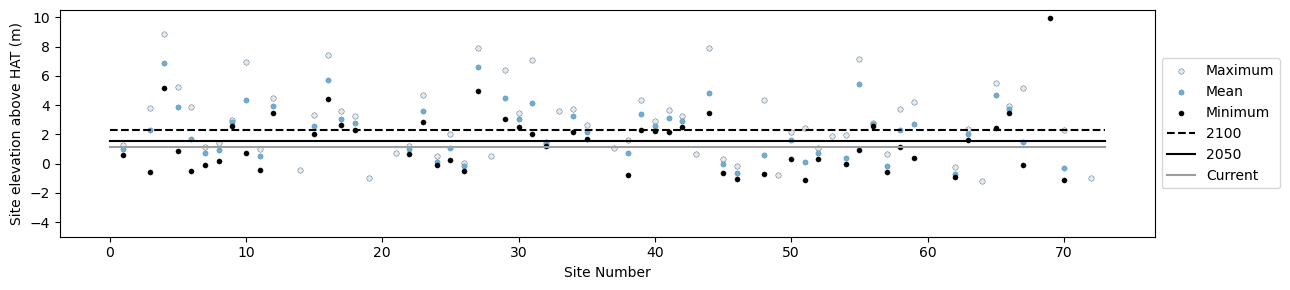

In [10]:
#KD plot for HAT with new tide levels, HAT equals 0, added line for HAT at 0, added line for new HAT for current storms 
# in JAN, added y line labels and changed colors
# KD we need to pick a way to organize x axis - maybe by lat/long? see next line
# Scatter plot with adjusted colors
# Scatter plot with adjusted colors and thinner black outlines
plt.scatter(pts.index, pts['HAT_max_within_5m'], s=15, color='#deebf7', label='Maximum', edgecolors='black', linewidth=0.2)
plt.scatter(pts.index, pts['HAT_mean_within_5m'], s=15, label='Mean', color='#6baed6', edgecolors='black', linewidth=0.1)
plt.scatter(pts.index, pts['HAT_min_within_5m'], s=15, label='Minimum', color='black', edgecolors='black', linewidth=0.1)

# Plot lines with corrected colors and labels
plt.plot((0, len(pts)), (1.112 + 1.18872, 1.112 + 1.18872), label='2100', linestyle='--', color='black')  # 3.9 ft by 2100
plt.plot((0, len(pts)), (1.112 + 0.4572, 1.112 + 0.4572), label='2050', color='black')  # 1.5 ft by 2050
plt.plot((0, len(pts)), (1.112, 1.112), color='#9d9d9d', label='Current')  # January storm event levels

# Adjust the plot limits, labels, and legend
plt.ylim(-5, 10.5)
plt.ylabel('Site elevation above HAT (m)')
plt.xlabel('Site Number')

# Move the legend to the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the figure size to half width (13 inches wide, 3 inches tall)
plt.gcf().set_size_inches(13, 3)

# Adjust the layout to prevent cutting off the x-axis label
plt.tight_layout()

# Define the file path for saving the plot image
file_path = r"C:\Users\kdewa\Documents\Archaeology_GIS\FINAL_FIGURES\Sites_SLR_threat_graph.png"

# Save the plot to the specified file path with specified dpi (dots per inch)
plt.savefig(file_path, dpi=600)

# Show the plot
plt.show()

In [23]:
pts

,MHPC Site Number,Town,RSPF Site Number,Alternate Name(s),Dates of visits,Notes,Notable references,Landowner,Access Notes,NAD83 Easting,NAD83 Northing,Coords updated from MHPC data,MHPC Forms Updated,Visited,Excavations by NEAS,Excavations by Us,Located,Unable to Locate,Confirmed Destroyed,geometry,NAVD88,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m,HAT_mean_within_5m,HAT_min_within_5m,HAT_max_within_5m
0,080.052-,Whiting,None,None,Unvisited,None,None,Unknown,None,643195.0,4960590.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (643195.000 4960590.000),16.881428,12.972428,1.417972e+01,1.405600e+01,1.434000e+01,1.457648e+01,1.366603e+01,1.757750e+01,-1.701412e+38,-3.402823e+38,2.085500e+01,-1.701412e+38,-3.402823e+38,2.321200e+01,1.297072e+01,1.284700e+01,1.313100e+01
1,080.055-,Edmunds Twp,None,None,Unvisited,None,None,Unknown,None,645501.0,4964207.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (645501.000 4964207.000),5.100000,1.191000,2.173221e+00,1.800000e+00,2.480000e+00,-1.701412e+38,-3.402823e+38,2.898571e+00,-1.701412e+38,-3.402823e+38,2.990000e+00,-1.701412e+38,-3.402823e+38,4.045000e+00,9.642214e-01,5.910000e-01,1.271000e+00
2,080.036-,Edmunds Twp,Me 126/24 RSPF,None,Unvisited,None,None,Unknown,None,646208.0,4966340.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646208.000 4966340.000),2.168750,-1.740250,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-1.701412e+38,-3.402823e+38,1.100000e+00,-1.701412e+38,-3.402823e+38,1.520000e+00,-3.402823e+38,-3.402823e+38,-3.402823e+38
3,080.047-,Edmunds Twp,Me 126/47?RSPF,None,Unvisited,None,None,Unknown,None,646315.0,4968070.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646315.000 4968070.000),6.420000,2.511000,3.504097e+00,6.650000e-01,5.000000e+00,-1.701412e+38,-3.402823e+38,5.360001e+00,-1.701412e+38,-3.402823e+38,5.700000e+00,-1.701412e+38,-3.402823e+38,6.472857e+00,2.295097e+00,-5.440000e-01,3.791000e+00
4,080.038-,Lubec,Me 126/38 RSPF,None,Unvisited,None,None,Unknown,None,654491.0,4968089.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (654491.000 4968089.000),10.775000,6.866000,8.088165e+00,6.360001e+00,1.008000e+01,-1.701412e+38,-3.402823e+38,1.356000e+01,-1.701412e+38,-3.402823e+38,1.677000e+01,-1.701412e+38,-3.402823e+38,2.132500e+01,6.879165e+00,5.151001e+00,8.871000e+00
5,080.046-,Lubec,Me 126/46 RSPF,None,Unvisited,None,None,Unknown,None,655182.0,4968739.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (655182.000 4968739.000),8.730000,4.821000,5.097791e+00,2.085000e+00,6.440001e+00,4.593962e+00,1.090007e-02,6.550000e+00,-1.701412e+38,-3.402823e+38,6.900001e+00,-1.701412e+38,-3.402823e+38,7.510000e+00,3.888791e+00,8.759998e-01,5.231001e+00
6,080.045-,Lubec,Me 126/45 RSPF,None,Unvisited,None,None,Unknown,None,655541.0,4968777.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (655541.000 4968777.000),4.839615,0.930615,2.915966e+00,7.200001e-01,5.049697e+00,-1.701412e+38,-3.402823e+38,5.660000e+00,-1.701412e+38,-3.402823e+38,6.150001e+00,-1.701412e+38,-3.402823e+38,6.520000e+00,1.706966e+00,-4.889999e-01,3.840697e+00
7,080.044-,Edmunds Twp,Me 126/44 RSPF,None,Unvisited,None,None,Unknown,None,646306.0,4968779.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646306.000 4968779.000),4.797500,0.888500,1.926580e+00,1.110000e+00,2.360000e+00,1.911395e+00,9.057143e-01,2.680000e+00,-1.701412e+38,-3.402823e+38,5.016125e+00,-1.701412e+38,-3.402823e+38,1.285000e+01,7.175797e-01,-9.900010e-02,1.151000e+00
8,080.011-,Edmunds Twp,Me 126/11 RSPF,None,Unvisited,None,None,Unknown,None,646116.0,4969224.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646116.000 4969224.000),4.936666,1.027666,2.150961e+00,1.360000e+00,2.595000e+00,2.108813e+00,1.325000e-01,2.888333e+00,-1.701412e+38,-3.402823e+

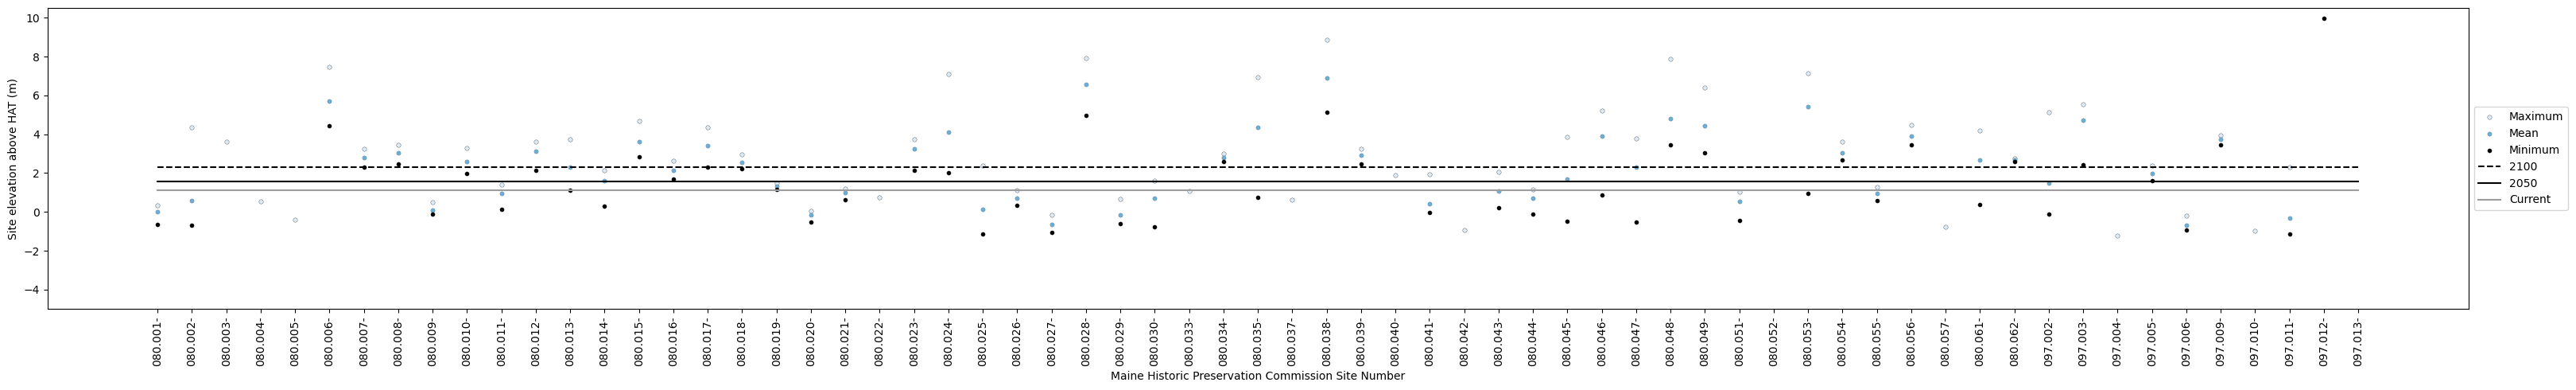

In [24]:
pts_sorted = pts.sort_values('MHPC Site Number')[(pts_sorted['HAT_min_within_5m']>-1000)|(pts_sorted['HAT_mean_within_5m']>-1000)|(pts_sorted['HAT_max_within_5m']>-1000)]

# Plot the scatter points with sorted data
plt.scatter(pts_sorted['MHPC Site Number'], pts_sorted['HAT_max_within_5m'], s=15, color='#deebf7', label='Maximum', edgecolors='black', linewidth=0.2)
plt.scatter(pts_sorted['MHPC Site Number'], pts_sorted['HAT_mean_within_5m'], s=15, label='Mean', color='#6baed6', edgecolors='black', linewidth=0.1)
plt.scatter(pts_sorted['MHPC Site Number'], pts_sorted['HAT_min_within_5m'], s=15, label='Minimum', color='black', edgecolors='black', linewidth=0.1)

# Plot lines with corrected colors and labels
plt.plot(pts_sorted['MHPC Site Number'], [1.112 + 1.18872] * len(pts_sorted), label='2100', linestyle='--', color='black')  # 3.9 ft by 2100
plt.plot(pts_sorted['MHPC Site Number'], [1.112 + 0.4572] * len(pts_sorted), label='2050', color='black')  # 1.5 ft by 2050
plt.plot(pts_sorted['MHPC Site Number'], [1.112] * len(pts_sorted), color='#9d9d9d', label='Current')  # January storm event levels

# Adjust the plot limits, labels, and legend
plt.ylim(-5, 10.5)
plt.ylabel('Site elevation above HAT (m)')
plt.xlabel('Maine Historic Preservation Commission Site Number')

# Set the figure size to accommodate all x-axis labels
fig_size = (len(pts_sorted) * 0.5, 5)  # Adjust width based on the number of data points
plt.gcf().set_size_inches(fig_size)

# Customize x-axis ticks to label every tenth MHPC Site Number at an angle
plt.xticks(pts_sorted['MHPC Site Number'], rotation=90)  # Label every tenth site number at 45 degrees rotation

# Move the legend to the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout to prevent cutting off the x-axis label
plt.tight_layout()

# Define the file path for saving the plot image
file_path = r"C:\Users\kdewa\Documents\Archaeology_GIS\FINAL_FIGURES\Sites_SLR_threat_graph4.png"

# Save the plot to the specified file path with specified dpi (dots per inch)
plt.savefig(file_path, dpi=600)

# Show the plot
plt.show()




C:\Users\kdewa\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1474: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


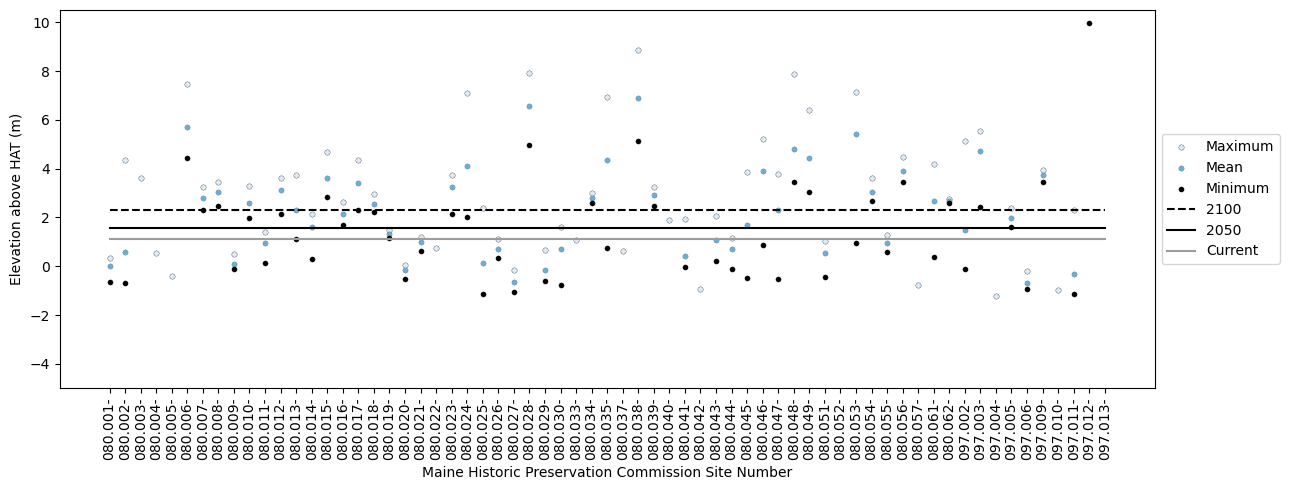

In [43]:

# Assuming 'pts' is your DataFrame containing the data
pts_sorted = pts.sort_values('MHPC Site Number')[(pts['HAT_min_within_5m'] > -1000) | (pts['HAT_mean_within_5m'] > -1000) | (pts['HAT_max_within_5m'] > -1000)]

# Plot the scatter points with sorted data
plt.scatter(pts_sorted['MHPC Site Number'], pts_sorted['HAT_max_within_5m'], s=15, color='#deebf7', label='Maximum', edgecolors='black', linewidth=0.2)
plt.scatter(pts_sorted['MHPC Site Number'], pts_sorted['HAT_mean_within_5m'], s=15, label='Mean', color='#6baed6', edgecolors='black', linewidth=0.1)
plt.scatter(pts_sorted['MHPC Site Number'], pts_sorted['HAT_min_within_5m'], s=15, label='Minimum', color='black', edgecolors='black', linewidth=0.1)

# Plot lines with corrected colors and labels
plt.plot(pts_sorted['MHPC Site Number'], [1.112 + 1.18872] * len(pts_sorted), label='2100', linestyle='--', color='black')  # 3.9 ft by 2100
plt.plot(pts_sorted['MHPC Site Number'], [1.112 + 0.4572] * len(pts_sorted), label='2050', color='black')  # 1.5 ft by 2050
plt.plot(pts_sorted['MHPC Site Number'], [1.112] * len(pts_sorted), color='#9d9d9d', label='Current')  # January storm event levels

# Adjust the plot limits, labels, and legend
plt.ylim(-5, 10.5)
plt.ylabel('Elevation above HAT (m)')
plt.xlabel('Maine Historic Preservation Commission Site Number')

# Set the figure size to accommodate all x-axis labels
fig_size = (len(pts_sorted) * 0.2, 5)  # Adjust width based on the number of data points
plt.gcf().set_size_inches(fig_size)

# Customize x-axis ticks with specific positions and labels
tick_positions = pts_sorted['MHPC Site Number']
tick_labels = pts_sorted['MHPC Site Number']
plt.xticks(tick_positions, tick_labels, rotation=90)

# Move the legend to the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout to prevent cutting off the x-axis label
plt.tight_layout()

# Define the file path for saving the plot image
file_path = r"C:\Users\kdewa\Documents\Archaeology_GIS\FINAL_FIGURES\Sites_SLR_threat_graph5.png"

# Save the plot to the specified file path with specified dpi (dots per inch)
plt.savefig(file_path, dpi=600)

# Show the plot
plt.show()

C:\Users\kdewa\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1474: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


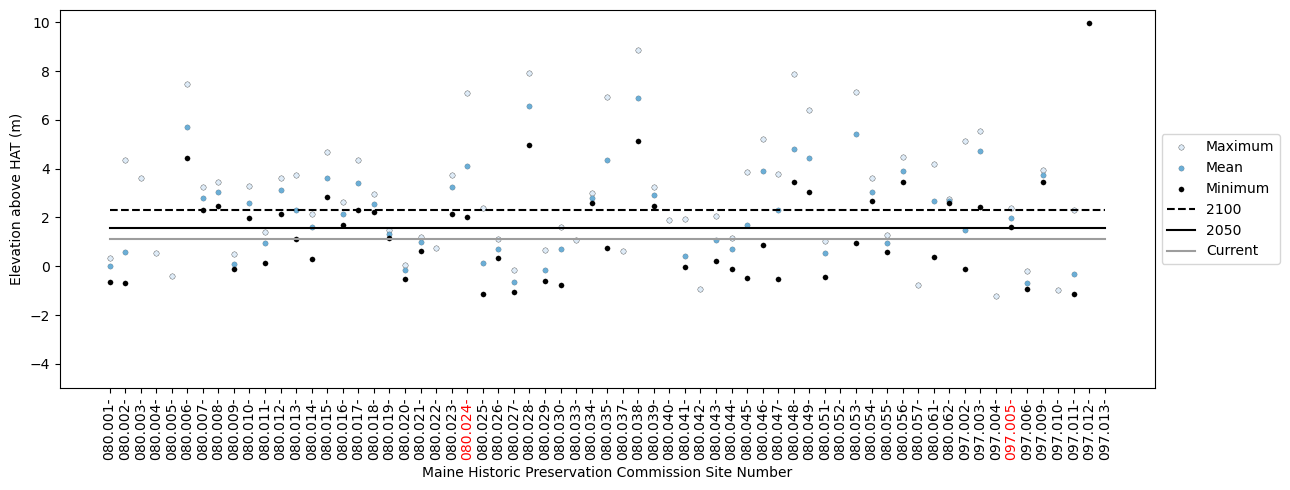

In [44]:

# Assuming 'pts' is your DataFrame containing the data
pts_sorted = pts.sort_values('MHPC Site Number')[(pts['HAT_min_within_5m'] > -1000) | (pts['HAT_mean_within_5m'] > -1000) | (pts['HAT_max_within_5m'] > -1000)]

# Plot the scatter points with sorted data
plt.scatter(pts_sorted['MHPC Site Number'], pts_sorted['HAT_max_within_5m'], s=15, color='#deebf7', label='Maximum', edgecolors='black', linewidth=0.2)
plt.scatter(pts_sorted['MHPC Site Number'], pts_sorted['HAT_mean_within_5m'], s=15, label='Mean', color='#6baed6', edgecolors='black', linewidth=0.1)
plt.scatter(pts_sorted['MHPC Site Number'], pts_sorted['HAT_min_within_5m'], s=15, label='Minimum', color='black', edgecolors='black', linewidth=0.1)

# Plot lines with corrected colors and labels
plt.plot(pts_sorted['MHPC Site Number'], [1.112 + 1.18872] * len(pts_sorted), label='2100', linestyle='--', color='black')  # 3.9 ft by 2100
plt.plot(pts_sorted['MHPC Site Number'], [1.112 + 0.4572] * len(pts_sorted), label='2050', color='black')  # 1.5 ft by 2050
plt.plot(pts_sorted['MHPC Site Number'], [1.112] * len(pts_sorted), color='#9d9d9d', label='Current')  # January storm event levels

# Adjust the plot limits, labels, and legend
plt.ylim(-5, 10.5)
plt.ylabel('Elevation above HAT (m)')
plt.xlabel('Maine Historic Preservation Commission Site Number')

# Set the figure size to accommodate all x-axis labels
fig_size = (len(pts_sorted) * 0.2, 5)  # Adjust width based on the number of data points
plt.gcf().set_size_inches(fig_size)

# Customize x-axis ticks with specific positions and labels
tick_positions = pts_sorted['MHPC Site Number']
tick_labels = pts_sorted['MHPC Site Number']

# Set x-axis tick labels
plt.xticks(tick_positions, tick_labels, rotation=90)

# Manually change the color of specific x-axis labels
for label in plt.gca().get_xticklabels():
    if label.get_text().strip() in ['080.024-', '097.005-']:  # Use strip() to remove any leading/trailing whitespace
        label.set_color('red')

# Move the legend to the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the layout to prevent cutting off the x-axis label
plt.tight_layout()

# Define the file path for saving the plot image
file_path = r"C:\Users\kdewa\Documents\Archaeology_GIS\FINAL_FIGURES\Sites_SLR_threat_graph6.png"

# Save the plot to the specified file path with specified dpi (dots per inch)
plt.savefig(file_path, dpi=600)

# Show the plot
plt.show()

,MHPC Site Number,Town,RSPF Site Number,Alternate Name(s),Dates of visits,Notes,Notable references,Landowner,Access Notes,NAD83 Easting,NAD83 Northing,Coords updated from MHPC data,MHPC Forms Updated,Visited,Excavations by NEAS,Excavations by Us,Located,Unable to Locate,Confirmed Destroyed,geometry,NAVD88,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m,HAT_mean_within_5m,HAT_min_within_5m,HAT_max_within_5m
45,080.001-,Eastport,Me 126/1 RSPF,"Moose Island, 'The Eastport Site'",4 June 21,"Visited, some shell visible and location appar...",None,Unknown,None,655003.0,4976712.0,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,POINT (655003.000 4976712.000),3.946250,0.037250,1.212235e+00,5.733333e-01,1.532000e+00,1.021097e+00,1.160000e-01,1.596667e+00,-1.701412e+38,-3.402823e+38,1.620000e+00,-1.701412e+38,-3.402823e+38,3.070000e+00,3.234783e-03,-6.356667e-01,3.229998e-01
48,080.002-,Perry,Me 126/2 RSPF,Toll Bridge Site,7 Aug 2019,Extensively excavated by NEAS,None,Poss for sale,Accessible from beach at end of Old Eastport Road,653640.0,4977676.0,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,POINT (653640.000 4977676.000),3.590000,-0.319000,1.793193e+00,5.100001e-01,5.560000e+00,2.475587e+00,7.999997e-02,5.830000e+00,-1.701412e+38,-3.402823e+38,6.000000e+00,-1.701412e+38,-3.402823e+38,6.610001e+00,5.841929e-01,-6.989999e-01,4.351000e+00
33,080.003-,Edmunds Twp,Me 126/13 RSPF,None,Unvisited,None,None,Unknown,None,643851.0,4972766.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (643851.000 4972766.000),NaN,NaN,-1.701412e+38,-3.402823e+38,4.830000e+00,-1.701412e+38,-3.402823e+38,4.994545e+00,-1.701412e+38,-3.402823e+38,7.170000e+00,-1.701412e+38,-3.402823e+38,1.059000e+01,-1.701412e+38,-3.402823e+38,3.621000e+00
28,080.004-,Edmunds Twp,Me 126/14 RSPF,None,Unvisited,None,None,Unknown,None,643585.0,4972420.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (643585.000 4972420.000),3.426269,-0.482731,-4.253529e+36,-3.402823e+38,1.760000e+00,-1.701412e+38,-3.402823e+38,2.120000e+00,-1.701412e+38,-3.402823e+38,3.230000e+00,-1.701412e+38,-3.402823e+38,4.220000e+00,-4.253529e+36,-3.402823e+38,5.510000e-01
14,080.005-,Washington County Island,Me 126/2 RSPF,None,Unvisited,None,None,Unknown,None,645775.0,4970241.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (645775.000 4970241.000),2.648571,-1.260429,-1.701412e+38,-3.402823e+38,8.000000e-01,-1.701412e+38,-3.402823e+38,1.550000e+00,-1.701412e+38,-3.402823e+38,1.675000e+00,-1.701412e+38,-3.402823e+38,2.580000e+00,-1.701412e+38,-3.402823e+38,-4.090000e-01
16,080.006-,Edmunds Twp,Me 126/7 RSPF,None,Unvisited,None,None,Unknown,None,645564.0,4970575.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (645564.000 4970575.000),9.720000,5.811000,6.931110e+00,5.654285e+00,8.665714e+00,6.593546e+00,3.050000e+00,9.590000e+00,-1.701412e+38,-3.402823e+38,9.610001e+00,-1.701412e+38,-3.402823e+38,1.104000e+01,5.722110e+00,4.445285e+00,7.456714e+00
18,080.007-,Washington County Island,Me 126/7 RSPF,None,Unvisited,None,None,Unknown,None,645578.0,4970982.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (645578.000 4970982.000),6.695000,2.786000,4.008162e+00,3.532500e+00,4.453333e+00,-1.701412e+38,-3.402823e+38,4.805000e+00,-1.701412e+38,-3.402823e+38,5.540000e+00,-1.701412e+38,-3.402823e+38,5.870000e+00,2.799162e+00,2.323500e+00,3.244333e+00
30,080.008-,Pembroke,Me 126/8 RSPF,None,Unvisited,None,None,Unknown,None,646261.0,4972603.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646261.000 4972603.000),6.830000,2.921000,4.266742e+00,3.680000e+00,4.660000e+00,4.099497e+00,2.903333e+00,4.782000e+00,3.752516e+00,2.084123e+00,4.860000e+00,-1.701412e+38,-3.402823e+38,5.810000e+00,3.057742e+00,2.471000e+00,3.451000e+00
24,080.009-,Pembroke,Me 126/9 RSPF,None,Unvisited,None,None,Unknown,None,646481.0,49716

In [20]:
~pts_sorted['HAT_min_within_5m'].isna()

45    True
48    True
33    True
28    True
14    True
16    True
18    True
30    True
24    True
15    True
8     True
41    True
58    True
50    True
23    True
35    True
39    True
40    True
32    True
26    True
22    True
21    True
34    True
31    True
51    True
52    True
46    True
27    True
57    True
38    True
13    True
47    True
37    True
9     True
10    True
2     True
43    True
4     True
42    True
53    True
54    True
19    True
25    True
7     True
6     True
5     True
3     True
44    True
29    True
20    True
11    True
0     True
55    True
17    True
1     True
12    True
49    True
59    True
56    True
36    True
68    True
67    True
65    True
64    True
63    True
62    True
60    True
61    True
66    True
72    True
70    True
69    True
71    True
Name: HAT_min_within_5m, dtype: bool

In [ ]:
plt.scatter(pts.index, pts['HAT_max_within_5m'], s=15, color='#c6dbef', label='Maximum', edgecolors='black', linewidth=0.1)
plt.scatter(pts.index, pts['HAT_mean_within_5m'], s=15, label='Mean', color='#4292c6', edgecolors='black', linewidth=0.1)
plt.scatter(pts.index, pts['HAT_min_within_5m'], s=15, label='Minimum', color='#08306b', edgecolors='black', linewidth=0.1)

In [13]:
# KD find which points are above 2100 ; 2050 ; Current
# Define the thresholds with meaningful names
thresholds = {
    "2100": 01.112+ 1.18872,
    "2050": 01.112 + 0.4572,
    "Current": 01.112
}

# Iterate over the thresholds
for label, threshold in thresholds.items():
    # Identify points above the threshold for each group
    above_threshold_min = pts[pts['MHW_min_within_5m'] > threshold]
    above_threshold_mean = pts[pts['MHW_mean_within_5m'] > threshold]
    above_threshold_max = pts[pts['MHW_max_within_5m'] > threshold]

    # Print the indices of the points above the threshold for each group
    print("Threshold:", label)
    print("Indices of points (min) above threshold:", above_threshold_min.index)
    print("Indices of points (mean) above threshold:", above_threshold_mean.index)
    print("Indices of points (max) above threshold:", above_threshold_max.index)
    print()

Threshold: 2100
Indices of points (min) above threshold: Index([ 0,  4,  9, 12, 15, 16, 17, 18, 23, 27, 29, 30, 31, 32, 34, 35, 39, 40,
       41, 42, 44, 56, 58, 63, 65, 66, 69, 71],
      dtype='int64')
Indices of points (mean) above threshold: Index([ 0,  3,  4,  5,  6,  9, 10, 12, 15, 16, 17, 18, 23, 27, 29, 30, 31, 32,
       34, 35, 39, 40, 41, 42, 44, 50, 55, 56, 58, 59, 63, 65, 66, 67, 69, 71],
      dtype='int64')
Indices of points (max) above threshold: Index([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 12, 15, 16, 17, 18, 22, 23, 25,
       27, 29, 30, 31, 32, 33, 34, 35, 38, 39, 40, 41, 42, 44, 48, 50, 51, 52,
       53, 54, 55, 56, 58, 59, 63, 65, 66, 67, 69, 70, 71],
      dtype='int64')

Threshold: 2050
Indices of points (min) above threshold: Index([ 0,  1,  4,  5,  9, 10, 12, 15, 16, 17, 18, 22, 23, 27, 29, 30, 31, 32,
       34, 35, 39, 40, 41, 42, 44, 55, 56, 58, 59, 63, 65, 66, 69, 71],
      dtype='int64')
Indices of points (mean) above threshold: Index([ 0,  1,  3,  4

In [14]:
# KD there are 73 sites
num_sites = len(pts)
print("Number of sites in pts:", num_sites)

Number of sites in pts: 73


In [21]:
# KD find how many sites are above 2100 ; 2050 ; current
# Define the thresholds with meaningful names
# Define thresholds with corrected keys and values
# Define thresholds for elevation ranges
thresholds = {
    "Not_Threatened_in_2100": 1.112 + 1.18872,    # 2100 threshold
    "Threatened_in_2100": 1.112 + 0.4572,          # 2100 threshold
    "Threatened_in_2050": 1.112,                   # 2050 threshold
    "Threatened_Current": 0                     # 0
}

# Iterate over the thresholds
for label, threshold in thresholds.items():
    if threshold == 0:
        # Placeholder for current threatened sites (below 0 m)
        above_threshold_min = pts[pts['MHW_min_within_5m'] < 0]
        above_threshold_mean = pts[pts['MHW_mean_within_5m'] < 0]
        above_threshold_max = pts[pts['MHW_max_within_5m'] < 0]
    else:
        # Identify points within the specified elevation range for each group
        if label == "Threatened_in_2050":
            above_threshold_min = pts[(pts['MHW_min_within_5m'] > 0) & (pts['MHW_min_within_5m'] <= threshold)]
            above_threshold_mean = pts[(pts['MHW_mean_within_5m'] > 0) & (pts['MHW_mean_within_5m'] <= threshold)]
            above_threshold_max = pts[(pts['MHW_max_within_5m'] > 0) & (pts['MHW_max_within_5m'] <= threshold)]
        else:
            above_threshold_min = pts[(pts['MHW_min_within_5m'] > threshold) & (pts['MHW_min_within_5m'] <= threshold + 0.4572)]
            above_threshold_mean = pts[(pts['MHW_mean_within_5m'] > threshold) & (pts['MHW_mean_within_5m'] <= threshold + 0.4572)]
            above_threshold_max = pts[(pts['MHW_max_within_5m'] > threshold) & (pts['MHW_max_within_5m'] <= threshold + 0.4572)]

    # Count the number of sites within the elevation range for each group
    count_min = len(above_threshold_min)
    count_mean = len(above_threshold_mean)
    count_max = len(above_threshold_max)

    # Print the counts for each threshold category
    print("Threshold:", label)
    print("Number of sites (min) within elevation range:", count_min)
    print("Number of sites (mean) within elevation range:", count_mean)
    print("Number of sites (max) within elevation range:", count_max)
    print()

Threshold: Not_Threatened_in_2100
Number of sites (min) within elevation range: 2
Number of sites (mean) within elevation range: 2
Number of sites (max) within elevation range: 6

Threshold: Threatened_in_2100
Number of sites (min) within elevation range: 4
Number of sites (mean) within elevation range: 6
Number of sites (max) within elevation range: 5

Threshold: Threatened_in_2050
Number of sites (min) within elevation range: 14
Number of sites (mean) within elevation range: 5
Number of sites (max) within elevation range: 7

Threshold: Threatened_Current
Number of sites (min) within elevation range: 19
Number of sites (mean) within elevation range: 19
Number of sites (max) within elevation range: 8



In [ ]:
# THIS IS WHERE I GOT THE DATA FOR THE TABLE
# Define elevation ranges for categorization
elevation_ranges = {
    "Below_1.112": (float('-inf'), 1.112),
    "1.112_to_1.112+0.4572": (1.112, 1.112 + 0.4572),
    "1.112+0.4572_to_1.112+1.18872": (1.112 + 0.4572, 1.112 + 1.18872),
    "Above_1.112+1.18872": (1.112 + 1.18872, float('inf'))
}

# Iterate over the elevation ranges
for label, (lower_bound, upper_bound) in elevation_ranges.items():
    # Identify points within the specified elevation range for min values
    within_elevation_range_min = pts[(pts['MHW_min_within_5m'] > lower_bound) & (pts['MHW_min_within_5m'] <= upper_bound)]
    within_elevation_range_mean = pts[(pts['MHW_mean_within_5m'] > lower_bound) & (pts['MHW_mean_within_5m'] <= upper_bound)]
    within_elevation_range_max = pts[(pts['MHW_max_within_5m'] > lower_bound) & (pts['MHW_max_within_5m'] <= upper_bound)]

    # Count the number of sites within each elevation range for min values
    count_min = len(within_elevation_range_min)
    count_mean = len(within_elevation_range_mean)
    count_max = len(within_elevation_range_max)

    # Print the counts for each elevation range category
    print("Elevation Range:", label)
    print("Number of sites (min) within elevation range:", count_min)
    print("Number of sites (mean) within elevation range:", count_mean)
    print("Number of sites (max) within elevation range:", count_max)
    print()

In [25]:
# THIS IS WHERE I GOT THE DATA FOR THE TABLE
# Define elevation ranges for categorization
elevation_ranges = {
    "Below_1.112": (float('-inf'), 1.112),
    "1.112_to_1.112+0.4572": (1.112, 1.112 + 0.4572),
    "1.112+0.4572_to_1.112+1.18872": (1.112 + 0.4572, 1.112 + 1.18872),
    "Above_1.112+1.18872": (1.112 + 1.18872, float('inf'))
}

# Initialize dictionaries to store the counts
data = {
    "Category": ["min", "mean", "max"]
}

# Iterate over the elevation ranges
for label, (lower_bound, upper_bound) in elevation_ranges.items():
    # Identify points within the specified elevation range for min values
    within_elevation_range_min = pts[(pts['MHW_min_within_5m'] > lower_bound) & (pts['MHW_min_within_5m'] <= upper_bound)]
    within_elevation_range_mean = pts[(pts['MHW_mean_within_5m'] > lower_bound) & (pts['MHW_mean_within_5m'] <= upper_bound)]
    within_elevation_range_max = pts[(pts['MHW_max_within_5m'] > lower_bound) & (pts['MHW_max_within_5m'] <= upper_bound)]

    # Count the number of sites within each elevation range for min values
    count_min = len(within_elevation_range_min)
    count_mean = len(within_elevation_range_mean)
    count_max = len(within_elevation_range_max)

    # Append counts to the data dictionary
    data[label] = [count_min, count_mean, count_max]

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Define the output file path
output_file_path = r"C:\Users\kdewa\Documents\Archaeology_GIS\FINAL_FIGURES\threatened_table_data.csv"

# Write the DataFrame to a CSV file with labeled columns and rows
df.to_csv(output_file_path, index=False)

print("CSV file saved successfully!")

CSV file saved successfully!


In [20]:
# Define thresholds with corrected keys and values
thresholds = {
    "Not_Threatened_in_2100": 1.112 + 1.18872,    # 2100 threshold
    "Threatened_in_2100": 1.112 + 0.4572,          # 2100 threshold
    "Threatened_in_2050": 1.112,                   # 2050 threshold
    "Threatened_Current": -500                     # No practical current threshold (-500 as placeholder)
}

# Iterate over the thresholds
for label, threshold in thresholds.items():
    # Identify points above the threshold for each group
    above_threshold_min = pts[pts['MHW_min_within_5m'] < threshold]
    above_threshold_mean = pts[pts['MHW_mean_within_5m'] < threshold]
    above_threshold_max = pts[pts['MHW_max_within_5m'] < threshold]

    # Count the number of sites above the threshold for each group
    count_min = len(above_threshold_min)
    count_mean = len(above_threshold_mean)
    count_max = len(above_threshold_max)

    # Print the counts
    print("Threshold:", label)
    print("Number of sites (min) above threshold:", count_min)
    print("Number of sites (mean) above threshold:", count_mean)
    print("Number of sites (max) above threshold:", count_max)
    print()

Threshold: Not_Threatened_in_2100
Number of sites (min) above threshold: 45
Number of sites (mean) above threshold: 37
Number of sites (max) above threshold: 24

Threshold: Threatened_in_2100
Number of sites (min) above threshold: 39
Number of sites (mean) above threshold: 27
Number of sites (max) above threshold: 17

Threshold: Threatened_in_2050
Number of sites (min) above threshold: 33
Number of sites (mean) above threshold: 24
Number of sites (max) above threshold: 15

Threshold: Threatened_Current
Number of sites (min) above threshold: 19
Number of sites (mean) above threshold: 19
Number of sites (max) above threshold: 8



In [63]:
pts

,MHPC Site Number,Town,RSPF Site Number,Alternate Name(s),Dates of visits,Notes,Notable references,Landowner,Access Notes,NAD83 Easting,NAD83 Northing,Coords updated from MHPC data,MHPC Forms Updated,Visited,Excavations by NEAS,Excavations by Us,Located,Unable to Locate,Confirmed Destroyed,geometry,NAVD88,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m,HAT_mean_within_5m,HAT_min_within_5m,HAT_max_within_5m
0,080.052-,Whiting,None,None,Unvisited,None,None,Unknown,None,643195.0,4960590.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (643195.000 4960590.000),16.881428,12.972428,1.417972e+01,1.405600e+01,1.434000e+01,1.457648e+01,1.366603e+01,1.757750e+01,-1.701412e+38,-3.402823e+38,2.085500e+01,-1.701412e+38,-3.402823e+38,2.321200e+01,1.297072e+01,1.284700e+01,1.313100e+01
1,080.055-,Edmunds Twp,None,None,Unvisited,None,None,Unknown,None,645501.0,4964207.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (645501.000 4964207.000),5.100000,1.191000,2.173221e+00,1.800000e+00,2.480000e+00,-1.701412e+38,-3.402823e+38,2.898571e+00,-1.701412e+38,-3.402823e+38,2.990000e+00,-1.701412e+38,-3.402823e+38,4.045000e+00,9.642214e-01,5.910000e-01,1.271000e+00
2,080.036-,Edmunds Twp,Me 126/24 RSPF,None,Unvisited,None,None,Unknown,None,646208.0,4966340.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646208.000 4966340.000),2.168750,-1.740250,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-1.701412e+38,-3.402823e+38,1.100000e+00,-1.701412e+38,-3.402823e+38,1.520000e+00,-3.402823e+38,-3.402823e+38,-3.402823e+38
3,080.047-,Edmunds Twp,Me 126/47?RSPF,None,Unvisited,None,None,Unknown,None,646315.0,4968070.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646315.000 4968070.000),6.420000,2.511000,3.504097e+00,6.650000e-01,5.000000e+00,-1.701412e+38,-3.402823e+38,5.360001e+00,-1.701412e+38,-3.402823e+38,5.700000e+00,-1.701412e+38,-3.402823e+38,6.472857e+00,2.295097e+00,-5.440000e-01,3.791000e+00
4,080.038-,Lubec,Me 126/38 RSPF,None,Unvisited,None,None,Unknown,None,654491.0,4968089.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (654491.000 4968089.000),10.775000,6.866000,8.088165e+00,6.360001e+00,1.008000e+01,-1.701412e+38,-3.402823e+38,1.356000e+01,-1.701412e+38,-3.402823e+38,1.677000e+01,-1.701412e+38,-3.402823e+38,2.132500e+01,6.879165e+00,5.151001e+00,8.871000e+00
5,080.046-,Lubec,Me 126/46 RSPF,None,Unvisited,None,None,Unknown,None,655182.0,4968739.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (655182.000 4968739.000),8.730000,4.821000,5.097791e+00,2.085000e+00,6.440001e+00,4.593962e+00,1.090007e-02,6.550000e+00,-1.701412e+38,-3.402823e+38,6.900001e+00,-1.701412e+38,-3.402823e+38,7.510000e+00,3.888791e+00,8.759998e-01,5.231001e+00
6,080.045-,Lubec,Me 126/45 RSPF,None,Unvisited,None,None,Unknown,None,655541.0,4968777.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (655541.000 4968777.000),4.839615,0.930615,2.915966e+00,7.200001e-01,5.049697e+00,-1.701412e+38,-3.402823e+38,5.660000e+00,-1.701412e+38,-3.402823e+38,6.150001e+00,-1.701412e+38,-3.402823e+38,6.520000e+00,1.706966e+00,-4.889999e-01,3.840697e+00
7,080.044-,Edmunds Twp,Me 126/44 RSPF,None,Unvisited,None,None,Unknown,None,646306.0,4968779.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646306.000 4968779.000),4.797500,0.888500,1.926580e+00,1.110000e+00,2.360000e+00,1.911395e+00,9.057143e-01,2.680000e+00,-1.701412e+38,-3.402823e+38,5.016125e+00,-1.701412e+38,-3.402823e+38,1.285000e+01,7.175797e-01,-9.900010e-02,1.151000e+00
8,080.011-,Edmunds Twp,Me 126/11 RSPF,None,Unvisited,None,None,Unknown,None,646116.0,4969224.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646116.000 4969224.000),4.936666,1.027666,2.150961e+00,1.360000e+00,2.595000e+00,2.108813e+00,1.325000e-01,2.888333e+00,-1.701412e+38,-3.402823e+

In [64]:
# KD create a table of percentage of site minumum elevation above 2100 + 0.06m; 2050 + 0.06; Jan storm + 0.06
# Define the thresholds with meaningful names
thresholds = {
    "Current":1.112,
    "2050": 1.112 + 0.4572 ,
    "2100": 1.112+ 1.18872 
}

# Initialize a dictionary to store the proportions
proportions = {}

# Get the total number of sites in pts
total_sites = len(pts)

# Iterate over the thresholds
for label, threshold in thresholds.items():
    # Identify points above the threshold for the 'min' group
    above_threshold_min = pts[pts['MHW_min_within_5m'] > threshold]

    # Count the number of sites above the threshold for the 'min' group
    count_min = len(above_threshold_min)

    # Calculate the proportion of sites above the threshold for the 'min' group
    proportion_min = count_min / total_sites * 100  # Convert to percentage

    # Store the proportion in the dictionary
    proportions[label] = proportion_min

# Create a DataFrame from the proportions dictionary
proportions_df = pd.DataFrame(proportions, index=["Proportion of sites in 'min' group above threshold (%)"])

# Transpose the DataFrame to have the thresholds as columns
proportions_df = proportions_df.T

# Display the DataFrame
print(proportions_df)

         Proportion of sites in 'min' group above threshold (%)
Current                                          54.794521     
2050                                             46.575342     
2100                                             38.356164     


In [45]:
# Define the thresholds with meaningful names
thresholds = {
    "Current": 1.112,
    "2050": 1.112 + 0.4572,
    "2100": 1.112 + 1.18872
}

# Initialize a dictionary to store the proportions
proportions = {}

# Get the total number of sites in pts
total_sites = len(pts)

# Iterate over the thresholds
for label, threshold in thresholds.items():
    # Initialize a dictionary to store the proportions for each group
    group_proportions = {}

    # Iterate over the groups (min, mean, max)
    for group in ['min', 'mean', 'max']:
        # Identify points above the threshold for the current group
        above_threshold = pts[pts[f'MHW_{group}_within_5m'] > threshold]

        # Count the number of sites above the threshold for the current group
        count = len(above_threshold)

        # Calculate the proportion of sites above the threshold for the current group
        proportion = count / total_sites * 100  # Convert to percentage

        # Store the proportion in the dictionary for the current group
        group_proportions[f"Proportion of sites in '{group}' group above threshold (%)"] = proportion

    # Store the proportions for the current threshold in the overall proportions dictionary
    proportions[label] = group_proportions

# Create a DataFrame from the proportions dictionary
proportions_df = pd.DataFrame(proportions)

# Display the DataFrame
print(proportions_df)

                                                      Current       2050  \
Proportion of sites in 'min' group above thresh...  54.794521  46.575342   
Proportion of sites in 'mean' group above thres...  67.123288  63.013699   
Proportion of sites in 'max' group above thresh...  79.452055  76.712329   

                                                         2100  
Proportion of sites in 'min' group above thresh...  38.356164  
Proportion of sites in 'mean' group above thres...  49.315068  
Proportion of sites in 'max' group above thresh...  67.123288  


In [46]:
#three panel figure of min, mean, max elevation underwater by current, 2050, 2100
#9 classes , make 3 columns with dates - 0, 1, 2



In [68]:
# Initialize the 'underwater_min' column with empty values
pts['underwater_min'] = ''

# Iterate over the rows of the DataFrame
for i in range(len(pts)):
    if pd.isnull(pts['MHW_min_within_5m'][i]):
        pts.loc[i, 'underwater_min'] = 'null'
    elif pts['MHW_min_within_5m'][i] > (1.112 + 1.18872):
        pts.loc[i, 'underwater_min'] = '2100'
    elif pts['MHW_min_within_5m'][i] > (1.112 + 0.4572): 
        pts.loc[i, 'underwater_min'] = '2050'
    elif pts['MHW_min_within_5m'][i] > (1.112): 
        pts.loc[i, 'underwater_min'] = 'Current'
    else:
        pts.loc[i, 'underwater_min'] = 'threat_now'

In [67]:
# Initialize the 'underwater_mean' column with empty values
pts['underwater_mean'] = ''

# Iterate over the rows of the DataFrame
for i in range(len(pts)):
    if pd.isnull(pts['MHW_mean_within_5m'][i]):
        pts.loc[i, 'underwater_mean'] = 'null'
    elif pts['MHW_mean_within_5m'][i] > (1.112 + 1.18872):
        pts.loc[i, 'underwater_mean'] = '2100'
    elif pts['MHW_mean_within_5m'][i] > (1.112 + 0.4572): 
        pts.loc[i, 'underwater_mean'] = '2050'
    elif pts['MHW_mean_within_5m'][i] > (1.112): 
        pts.loc[i, 'underwater_mean'] = 'Current'
    else:
        pts.loc[i, 'underwater_mean'] = 'threat_now'

In [66]:
# Initialize the 'underwater_max' column with empty values
pts['underwater_max'] = ''

# Iterate over the rows of the DataFrame
for i in range(len(pts)):
    if pd.isnull(pts['MHW_max_within_5m'][i]):
        pts.loc[i, 'underwater_max'] = 'null'
    elif pts['MHW_max_within_5m'][i] > (1.112 + 1.18872):
        pts.loc[i, 'underwater_max'] = '2100'
    elif pts['MHW_max_within_5m'][i] > (1.112 + 0.4572): 
        pts.loc[i, 'underwater_max'] = '2050'
    elif pts['MHW_max_within_5m'][i] > (1.112): 
        pts.loc[i, 'underwater_max'] = 'Current'
    else:
        pts.loc[i, 'underwater_max'] = 'threat_now'

In [69]:
pts

,MHPC Site Number,Town,RSPF Site Number,Alternate Name(s),Dates of visits,Notes,Notable references,Landowner,Access Notes,NAD83 Easting,NAD83 Northing,Coords updated from MHPC data,MHPC Forms Updated,Visited,Excavations by NEAS,Excavations by Us,Located,Unable to Locate,Confirmed Destroyed,geometry,NAVD88,HAT,MHW_mean_within_5m,MHW_min_within_5m,MHW_max_within_5m,MHW_mean_within_10m,MHW_min_within_10m,MHW_max_within_10m,MHW_mean_within_20m,MHW_min_within_20m,MHW_max_within_20m,MHW_mean_within_40m,MHW_min_within_40m,MHW_max_within_40m,HAT_mean_within_5m,HAT_min_within_5m,HAT_max_within_5m,underwater_max,underwater_mean,underwater_min
0,080.052-,Whiting,None,None,Unvisited,None,None,Unknown,None,643195.0,4960590.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (643195.000 4960590.000),16.881428,12.972428,1.417972e+01,1.405600e+01,1.434000e+01,1.457648e+01,1.366603e+01,1.757750e+01,-1.701412e+38,-3.402823e+38,2.085500e+01,-1.701412e+38,-3.402823e+38,2.321200e+01,1.297072e+01,1.284700e+01,1.313100e+01,2100,2100,2100
1,080.055-,Edmunds Twp,None,None,Unvisited,None,None,Unknown,None,645501.0,4964207.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (645501.000 4964207.000),5.100000,1.191000,2.173221e+00,1.800000e+00,2.480000e+00,-1.701412e+38,-3.402823e+38,2.898571e+00,-1.701412e+38,-3.402823e+38,2.990000e+00,-1.701412e+38,-3.402823e+38,4.045000e+00,9.642214e-01,5.910000e-01,1.271000e+00,2100,2050,2050
2,080.036-,Edmunds Twp,Me 126/24 RSPF,None,Unvisited,None,None,Unknown,None,646208.0,4966340.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646208.000 4966340.000),2.168750,-1.740250,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-1.701412e+38,-3.402823e+38,1.100000e+00,-1.701412e+38,-3.402823e+38,1.520000e+00,-3.402823e+38,-3.402823e+38,-3.402823e+38,threat_now,threat_now,threat_now
3,080.047-,Edmunds Twp,Me 126/47?RSPF,None,Unvisited,None,None,Unknown,None,646315.0,4968070.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646315.000 4968070.000),6.420000,2.511000,3.504097e+00,6.650000e-01,5.000000e+00,-1.701412e+38,-3.402823e+38,5.360001e+00,-1.701412e+38,-3.402823e+38,5.700000e+00,-1.701412e+38,-3.402823e+38,6.472857e+00,2.295097e+00,-5.440000e-01,3.791000e+00,2100,2100,threat_now
4,080.038-,Lubec,Me 126/38 RSPF,None,Unvisited,None,None,Unknown,None,654491.0,4968089.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (654491.000 4968089.000),10.775000,6.866000,8.088165e+00,6.360001e+00,1.008000e+01,-1.701412e+38,-3.402823e+38,1.356000e+01,-1.701412e+38,-3.402823e+38,1.677000e+01,-1.701412e+38,-3.402823e+38,2.132500e+01,6.879165e+00,5.151001e+00,8.871000e+00,2100,2100,2100
5,080.046-,Lubec,Me 126/46 RSPF,None,Unvisited,None,None,Unknown,None,655182.0,4968739.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (655182.000 4968739.000),8.730000,4.821000,5.097791e+00,2.085000e+00,6.440001e+00,4.593962e+00,1.090007e-02,6.550000e+00,-1.701412e+38,-3.402823e+38,6.900001e+00,-1.701412e+38,-3.402823e+38,7.510000e+00,3.888791e+00,8.759998e-01,5.231001e+00,2100,2100,2050
6,080.045-,Lubec,Me 126/45 RSPF,None,Unvisited,None,None,Unknown,None,655541.0,4968777.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (655541.000 4968777.000),4.839615,0.930615,2.915966e+00,7.200001e-01,5.049697e+00,-1.701412e+38,-3.402823e+38,5.660000e+00,-1.701412e+38,-3.402823e+38,6.150001e+00,-1.701412e+38,-3.402823e+38,6.520000e+00,1.706966e+00,-4.889999e-01,3.840697e+00,2100,2100,threat_now
7,080.044-,Edmunds Twp,Me 126/44 RSPF,None,Unvisited,None,None,Unknown,None,646306.0,4968779.0,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,POINT (646306.000 4968779.000),4.797500,0.888500,1.926580e+00,1.110000e+00,2.360000e+00,1.911395e+00,9.057143e-01,2.680000e+00,-1.701412e+38,-3.402823e+38,5.016125e+00,-1.701412e+38,-3.402823e+38,1.285000e+01,7.175797e-01,-9.900010e-02,1.151000e+00,2100,2050,threat_now
8,080.011-,Edmunds Twp,Me 126/11 RSPF,None,Unvisited,None,None,Unknown,None,646116.0,4969224.

In [70]:
pts.to_csv('points_to_map.csv', index=False)

In [50]:
pts.iloc[52] 

MHPC Site Number                                                          080.026-
Town                                                                         Perry
RSPF Site Number                                                    Me 126/26 RSPF
Alternate Name(s)                                                  Mincher's Point
Dates of visits                                                     16 August 2021
Notes                                                                         None
Notable references                                                            None
Landowner                                                       Kelly Adams of NYC
Access Notes                     Take unmarked last right off mountain road bef...
NAD83 Easting                                                             648765.0
NAD83 Northing                                                           4978045.0
Coords updated from MHPC data                                                 TRUE
MHPC